# Estudo de clientes de atacado

Para o segundo trabalho, escolhemos o dataset Wholesale customers obtido em UCI ML https://archive.ics.uci.edu/ml/datasets/Wholesale+customers.

O conjunto de dados refere-se a clientes de um distribuidor de atacado. Inclui os gastos anuais em USD em diversas categorias de produtos. A base também continha informação de canal e região, mas excluímos pois não serão úteis para nosso estudo.

O problema que queremos resolver é descobrir automaticamente agrupamentos de clientes nesta base de dados para trabalhar uma campanha de marketing mais focada.

Para este problema, vamos utilizar o algoritmo de clusterização k-Means.

## Análise e processamento do conjunto de dados

In [34]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("wholesale_customers.csv")
del df["Channel"]
del df["Region"]
print(df.shape)
df.head()

(440, 6)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [35]:
# Verifica se há dados faltantes
df.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [36]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Comentários da análise

Observando as estatísticas do conjunto de dados, notamos uma grande variedade nos dados. Para fazer uma campanha de marketing focada, precisamos criar grupos de clientes com perfis semelhantes para a campanha ser mais efetiva.

Vamos tentar agrupar esses clientes automaticamente em clusters homogêneos.

---

## Treinamento do modelo

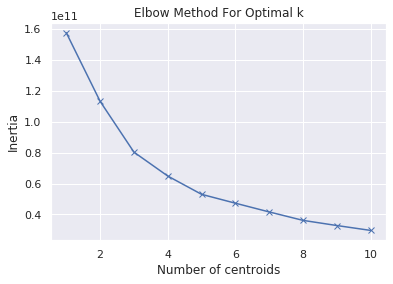

In [37]:
# Para definir o número de clusters que queremos ter como resultado, usaremos o método Elbow:
inertia = []
i_range = range(1,11)
for i in i_range:
    kmeans = KMeans(n_clusters=i,random_state=123)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(i_range, inertia, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

Text(0.5, 1.0, 'Gastos por cluster')

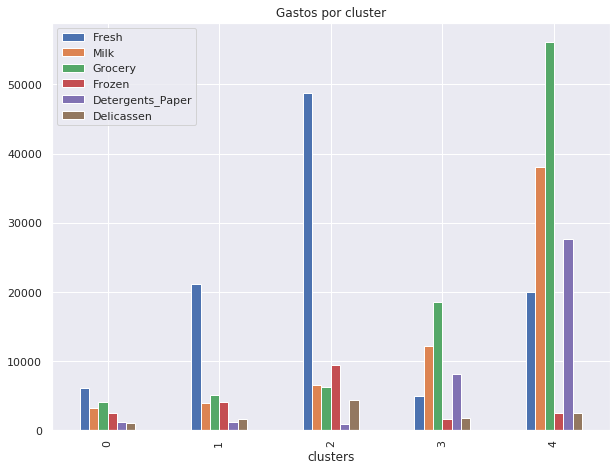

In [38]:
data_array = df.values
# olhando o gráfico, inferi-se que k=5 é um bom palpite
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=123)
# Adiciona a coluna cluster ao dataframe de dados
df["clusters"] = kmeans.fit_predict(data_array)
# Calcula a média dos dados por cluster e plotar no formato de gráfico barras
df.groupby("clusters").aggregate("mean").plot.bar(figsize=(10,7.5))
plt.title("Gastos por cluster")

### Comentários do treinamento

Como podemos ver temos dados muito mais claros:

- cluster 0 parece ser os clientes que gastam pouco, distribuído entre todos os produtos
- cluster 1 também não gasta tanto, porém os gastos são focados em groceries
- cluster 2 já são os clientes que tem uma despesa maior e são bem focados em alimentos frescos
- cluster 3 também são os clientes focados em alimentos frescos, porém com um gasto total menor
- cluster 4 são os clientes que gastam mais, porém focados em groceries